# Select Kr events events for run 7439

## Scope 

- This NB selects Kr events for run 7439.

- Run 7439. August 2019. HE run. 


### Author:  JJGC

### Software: KrCalib : https://github.com/nextic/ICAROS/

## Imports

In [2]:
import time
import os
print("Last updated on ", time.asctime())

Last updated on  Mon Aug 19 18:49:33 2019


In [664]:
run_number  = 7439
file_range  = 0, 8953

input_path  = f"$IC_DATA/kdst"
output_path = f"$IC_DATA/dst"
log_path    = f"$IC_DATA/log"
trigger     = 'trigger1'
tags        = 'v1.1.0_20190801_krbg'

emap_filename   = os.path.expandvars(f'$IC_DATA/maps/kr_emap_xy_50_50_r_{run_number}.h5')
write_filtered_dst = True

In [4]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = 10, 8
plt.rcParams["font.size"     ] = 14

In [5]:
import sys
import time
import datetime 
import numpy as np
import pandas as pd
import tables            as tb
import random
import glob
import warnings
import seaborn as sns
sns.set()

In [6]:
from numpy import pi, sqrt

In [7]:
from  invisible_cities.io.dst_io              import load_dsts
from  invisible_cities.core .core_functions   import in_range
from  invisible_cities.core.system_of_units_c import units

In [8]:
import krcal.dev.corrections                  as corrections 
import krcal.utils.hst_extend_functions       as hst
from krcal.core import fit_functions_ic       as fitf
import invisible_cities.reco.corrections      as corrf

In [544]:
from krcal.core.stat_functions                import mean_and_std
from krcal.core.core_functions                import time_delta_from_time
from krcal.core.core_functions                import phirad_to_deg
from krcal.core.core_functions                import NN
from krcal.core.core_functions                import timeit
from krcal.core.core_functions                import data_frames_are_identical

from krcal.core.io_functions                  import filenames_from_paths
from krcal.core.io_functions                  import filenames_from_list
from krcal.core.io_functions                  import kdst_write
from krcal.core.io_functions                  import write_maps
from krcal.core.io_functions                  import read_maps
from krcal.core.io_functions                  import write_maps_ts
from krcal.core.io_functions                  import read_maps_ts

from krcal.core.ranges_and_bins_functions     import kr_ranges_and_bins

from krcal.core.histo_functions               import h1, h1d, h2, h2d, profile1d, plot_histo
from krcal.core.kr_types                      import PlotLabels, FitType

from krcal.core.s1s2_functions                import s1d_from_dst
from krcal.core.s1s2_functions                import s2d_from_dst
from krcal.core.s1s2_functions                import plot_s1histos
from krcal.core.s1s2_functions                import plot_s2histos
from krcal.core.s1s2_functions                import energy_time_profile
from krcal.core.s1s2_functions                import energy_X_profile

from krcal.core.plt_functions                 import plot_xy_density
from krcal.core.plt_functions                 import plot_s1_vs_z
from krcal.core.plt_functions                 import plot_s2_vs_z
from krcal.core.plt_functions                 import plot_s2_vs_s1
from krcal.core.plt_functions                 import plot_q_vs_s2
from krcal.core.plt_functions                 import plot_energy_distributions
from krcal.core.plt_functions                 import plot_energy_vs_t

from krcal.core.selection_functions           import event_map_df
from krcal.core.selection_functions           import select_rphi_sectors_df
from krcal.core.selection_functions           import select_xy_sectors_df
from krcal.core.selection_functions           import get_time_series_df
from krcal.core.fitmap_functions              import time_fcs_df
from krcal.core.fitmap_functions              import fit_fcs_in_rphi_sectors_df
from krcal.core.fitmap_functions              import fit_map_xy_df

from krcal.core.fit_lt_functions              import fit_lifetime, fit_lifetime_unbined
from krcal.core.fit_functions                 import fit_profile_1d_expo
from krcal.core.fit_functions                 import expo_seed
from krcal.core.map_functions                 import tsmap_from_fmap
from krcal.core.map_functions                 import amap_from_tsmap
from krcal.core.map_functions                 import relative_errors
from krcal.core.map_functions                 import amap_average
from krcal.core.map_functions                 import amap_max
from krcal.core.map_functions                 import amap_min
from krcal.core.map_functions                 import amap_replace_nan_by_mean
from krcal.core.map_functions                 import amap_replace_nan_by_zero
from krcal.core.map_functions                 import regularize_maps
from krcal.core.map_functions                 import get_maps_from_tsmap
from krcal.core.map_functions                 import map_average
from krcal.core.map_functions                 import add_mapinfo

from krcal.core.xy_maps_functions             import draw_xy_maps
from krcal.core.xy_maps_functions             import draw_xy_map
from krcal.core.xy_maps_functions             import draw_xy_maps_ts

from krcal.core.rphi_maps_functions           import draw_rphi_maps
from krcal.core.rphi_maps_functions           import draw_rphi_map
from krcal.core.rphi_maps_functions           import draw_rphi_maps_ts
from krcal.core.rphi_maps_functions           import draw_wedges
from krcal.core.rphi_maps_functions           import define_rphi_sectors
from krcal.core.rphi_maps_functions           import rphi_sector_map_def

from krcal.core.correction_functions          import e0_rphi_correction
from krcal.core.correction_functions          import e0_xy_correction
from krcal.core.correction_functions          import lt_xy_correction
from krcal.core.correction_functions          import e0_xy_correction_ts
from krcal.core.correction_functions          import lt_xy_correction_ts
from krcal.core.correction_functions          import lt_rphi_correction
from krcal.core.correction_functions          import lt_rphi_correction_ts
from krcal.core.correction_functions          import e0_rphi_correction_ts
from krcal.core.correction_functions          import e0_rphi_correction_ts

from krcal.core.fit_lt_histograms             import plot_time_fcs
from krcal.core.fit_energy_functions          import fit_energy
from krcal.core.fit_energy_functions          import plot_fit_energy
from krcal.core.fit_energy_functions          import print_fit_energy
from krcal.core.fit_energy_functions          import resolution_r_z
from krcal.core.fit_energy_functions          import plot_resolution_r_z

### Logger

### Logger


- CRITICAL
- ERROR
- WARNING
- INFO
- DEBUG



In [10]:
import logging


logging.basicConfig(format='%(asctime)s | %(levelname)s : %(message)s',
                     level=logging.INFO, stream=sys.stdout)

logging.info('Hello world!')
log = logging.getLogger()

2019-08-19 18:49:49,765 | INFO : Hello world!


### Input/output 

In [14]:
input_dst_filenames, output_dst_filename, log_filename = filenames_from_paths(run_number,
                                                                              input_path,
                                                                              output_path,
                                                                              log_path,
                                                                              trigger,
                                                                              tags,
                                                                              file_range)
                                                                              
print(f'input dsts:\n first = {input_dst_filenames[0]}\n last = {input_dst_filenames[-1]}')
print(f"output dst = {output_dst_filename}")
print(f"log file   = {log_filename}")                       

input dsts:
 first = /Users/jjgomezcadenas/Projects/ICDATA/kdst/7439/kdst_0000_7439_trigger1_v1.1.0_20190801_krbg.h5
 last = /Users/jjgomezcadenas/Projects/ICDATA/kdst/7439/kdst_8952_7439_trigger1_v1.1.0_20190801_krbg.h5
output dst = /Users/jjgomezcadenas/Projects/ICDATA/dst/dst_7439_trigger1_0000_8952.h5
log file   = /Users/jjgomezcadenas/Projects/ICDATA/log/log_7439_trigger1_0000_8952.h5


In [15]:
dst_full           = load_dsts(input_dst_filenames, "DST", "Events")

In [16]:
unique_events = ~dst_full.event.duplicated()

number_of_S2s_full  = np.size         (unique_events)
number_of_evts_full = np.count_nonzero(unique_events)

print(f"Total number of S2s   : {number_of_S2s_full} ")
print(f"Total number of events: {number_of_evts_full}")

Total number of S2s   : 3502664 
Total number of events: 1752758


In [395]:
dst_full.columns

Index(['event', 'time', 's1_peak', 's2_peak', 'nS1', 'nS2', 'S1w', 'S1h',
       'S1e', 'S1t', 'S2w', 'S2h', 'S2e', 'S2q', 'S2t', 'Nsipm', 'DT', 'Z',
       'Zrms', 'X', 'Y', 'R', 'Phi', 'Xrms', 'Yrms'],
      dtype='object')

In [18]:
ntot = len(dst_full)
print(f"length of dst = {ntot}")

length of dst = 3502664


## First step, selection of events with 1 S1 and 1S2

- Due to the background of HE events, the overall selection has an efficiency of ~50 % in S1 and ~50 % in S2

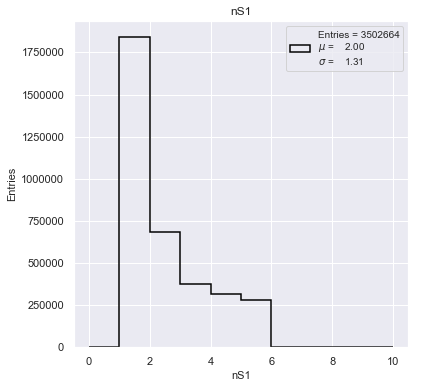

In [19]:
n, b, _, _ = h1d(dst_full.nS1.values, bins = 10, range = (0,10),
           pltLabels=PlotLabels(x='nS1', y='Entries', title='nS1'))

In [20]:
fnS1 = n[n.argmax()]/np.sum(n)
print(f'fraction of S1s = {fnS1}')

fraction of S1s = 0.5263350980853431


In [21]:
dst1s1 = dst_full[in_range(dst_full.nS1, 1,2)]

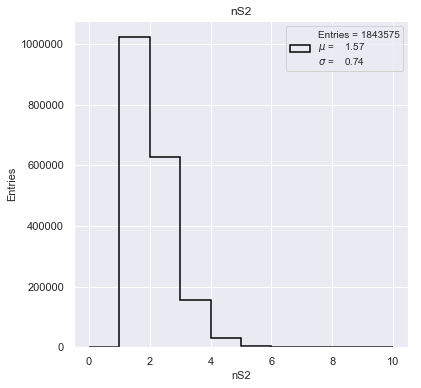

In [22]:
n, b, _, _ = h1d(dst1s1.nS2.values, bins = 10, range = (0,10),
           pltLabels=PlotLabels(x='nS2', y='Entries', title='nS2'))

In [ ]:
fnS2 = n[n.argmax()]/np.sum(n)
print(f'fraction of S2s = {fnS2}')

In [757]:
dst    = dst1s1[in_range(dst1s1.nS2, 1, 2)]

In [758]:
n_full   = len(dst)
eff = n_full   / ntot 
print(f"Total number of events with 1 s1 and 1 s2 : {n_full}: selection eff = {eff} ")

Total number of events with 1 s1 and 1 s2 : 1024319: selection eff = 0.29243998282450157 


### After 1 S1 and 1 S2, the total number of events remaining is ~1 M. 

In [759]:
s1d = s1d_from_dst(dst)

### S1 distributins appear normal 

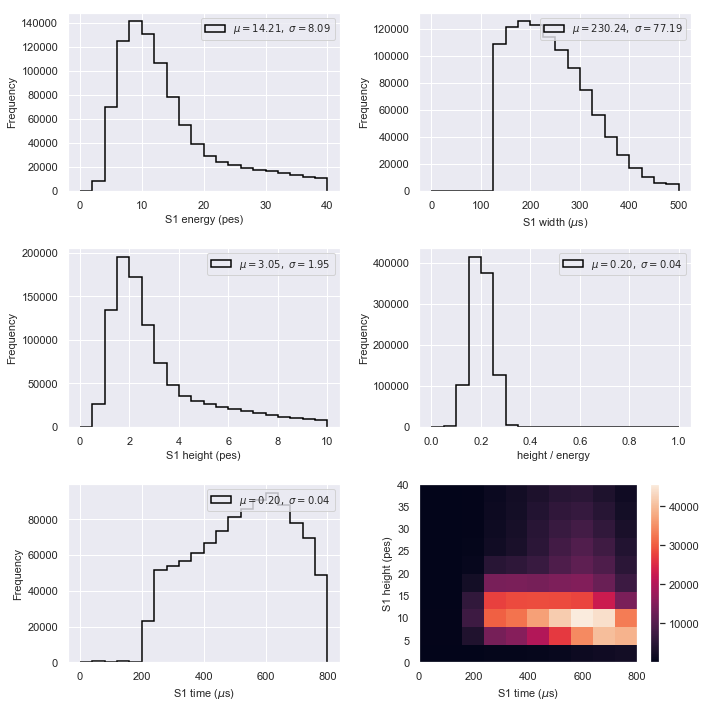

In [760]:
plot_s1histos(dst,  s1d, bins=20, figsize=(10,10))

### Z distribution shows a peak at around 200, probably related with HE sources

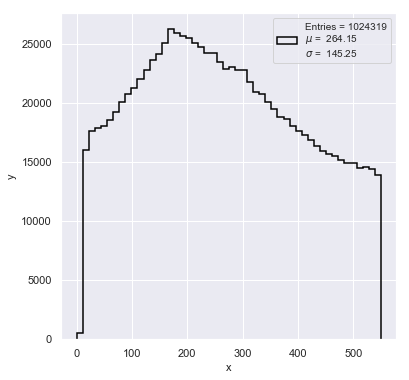

In [761]:
(_) = h1d(dst.Z, bins = 50, range =(0,550))

### S2 distribution show the presence of background from HE in the tails of S2 and S2 width. X and Y distributions also show asymmetry or sources. 

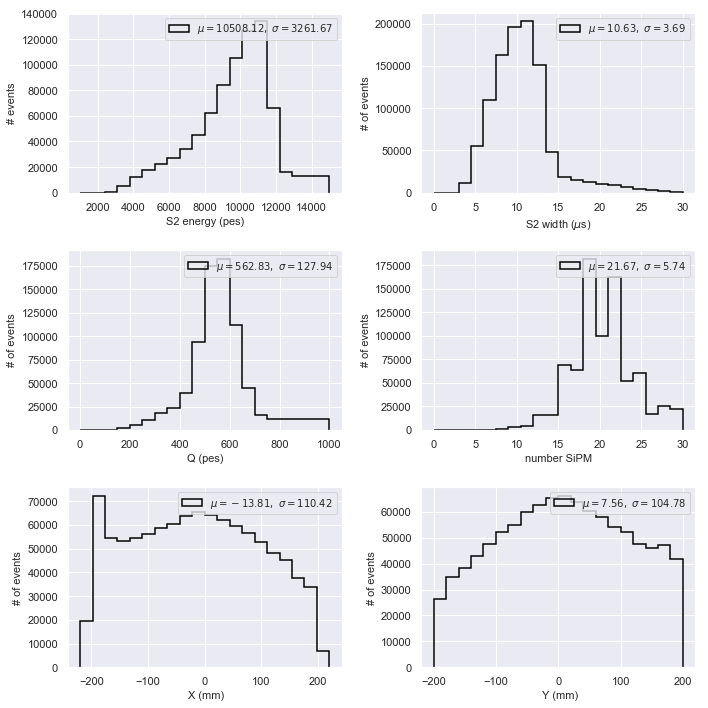

In [762]:
s2d = s2d_from_dst(dst)
plot_s2histos(dst, s2d, bins=20, emin=1000, emax=15000, figsize=(10,10))

### Ranges and binning

In [763]:
RMAX      = 200
RFID      = 180
RCORE     = 100
s1e_range = (3, 25)
s2e_range = (2000, 18000)
s2q_range = (200, 800)

xy_range  = (-RMAX,  RMAX)
z_range   = (10,  550)
e_range   = s2e_range
lt_range  = (1000, 11000)
c2_range  = (0,5)
time_bins = 1

## Bins and ranges

In [764]:
krTimes, krRanges, krNbins, krBins = kr_ranges_and_bins(dst,
                                                        xxrange   = xy_range,
                                                        yrange    = xy_range,
                                                        zrange    = z_range,
                                                        s2erange  = s2e_range,
                                                        s1erange  = s1e_range,
                                                        s2qrange  = s2q_range,
                                                        xnbins    = 50,
                                                        ynbins    = 50,
                                                        znbins    = 15,
                                                        s2enbins  = 25,
                                                        s1enbins  = 10,
                                                        s2qnbins  = 25,
                                                        tpsamples = 3600) # tsamples in seconds

### Sort DST in time and add DT column (DT is a vector of time differences)

In [765]:
dstx     = dst[in_range(dst.X, -RMAX, RMAX)]
dst      = dstx[in_range(dstx.Y, -RMAX, RMAX)]
dst_time = dst.sort_values('time')
T       = dst_time.time.values
DT      = time_delta_from_time(T)
dst = dst.assign(DT=DT)
dst.columns

Index(['event', 'time', 's1_peak', 's2_peak', 'nS1', 'nS2', 'S1w', 'S1h',
       'S1e', 'S1t', 'S2w', 'S2h', 'S2e', 'S2q', 'S2t', 'Nsipm', 'DT', 'Z',
       'Zrms', 'X', 'Y', 'R', 'Phi', 'Xrms', 'Yrms'],
      dtype='object')

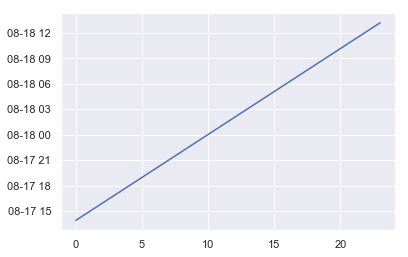

In [766]:
plt.plot(krTimes.timeStamps)

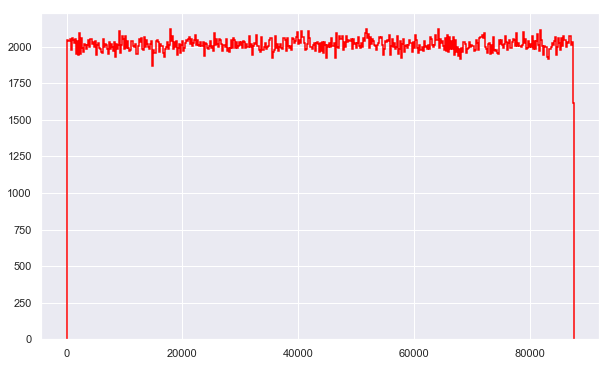

In [767]:
fig = plt.figure(figsize=(10,6))
ax      = fig.add_subplot(1, 1, 1)
(_)    = h1(dst.DT.values, bins=500, range = (dst.DT.values[0], dst.DT.values[-1]), color='red', stats=False, lbl='pre-sel')

### Event distribution

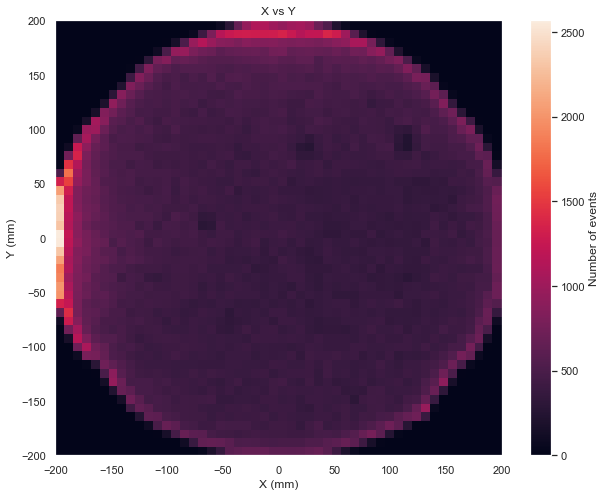

In [768]:
nevt = h2d(dst.X, dst.Y, krNbins.X, krNbins.Y, (-200,200), (-200,200), 
           pltLabels=PlotLabels(x='X (mm)', y='Y (mm)', title='X vs Y'),
           profile=False,
           figsize=(10,8))

### We use a map previously computed for run 7439 as bootstrap. 

In [769]:
bootstrap_corr_f   = '/Users/jjgomezcadenas/Projects/ICDATA/maps/kr_emap_xy_100_100_r_7439.h5'
write_filtered_dst = True
print(bootstrap_corr_f)
emaps = read_maps(filename=bootstrap_corr_f)
norm = amap_max(emaps)
norm

/Users/jjgomezcadenas/Projects/ICDATA/maps/kr_emap_xy_100_100_r_7439.h5


ASectorMap(chi2=3.2363782362084965, e0=12646.619870064445, lt=11627.746602188212, e0u=0.7482773902330715, ltu=14.88768408290421, mapinfo=None)

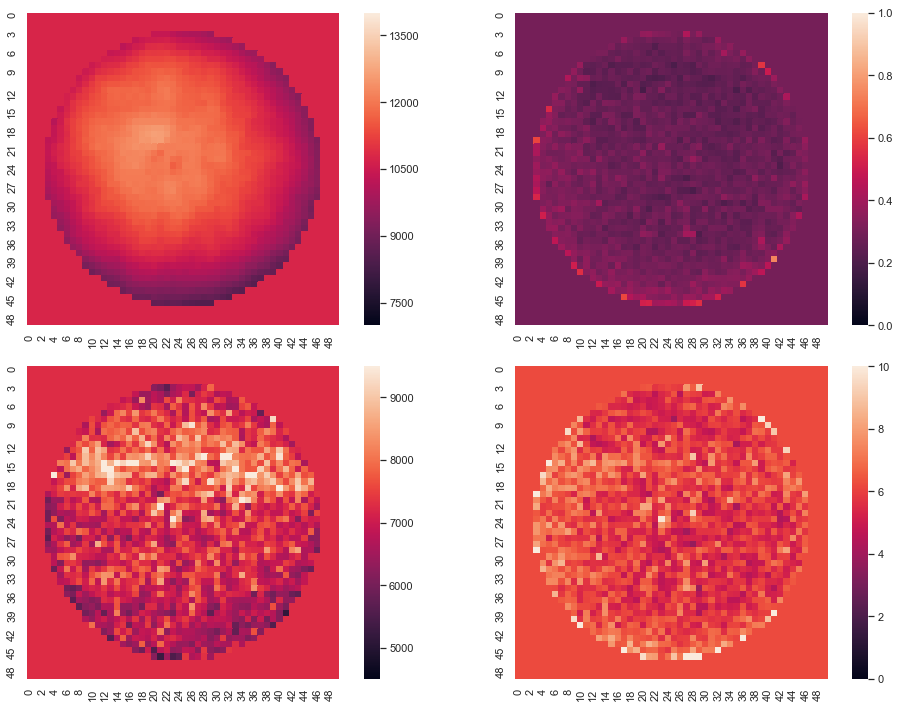

In [770]:
draw_xy_maps(emaps,
            e0lims  = (7000, 14000),
            ltlims  = (4500, 9500),
            eulims  = (0.0,  1),
            lulims  = (0, 10),
            figsize=(14,10))

### Now apply geometrical correction to data

In [771]:
ti = timeit(e0_xy_correction)
E0 = ti(dst.S2e.values,
        dst.X.values,
        dst.Y.values,
        E0M = emaps.e0 / norm.e0, 
        xr  = krRanges.X,
        yr  = krRanges.Y,
        nx  = krNbins.X, 
        ny  = krNbins.Y)

Time spent in e0_xy_correction: 9.897321939468384 s


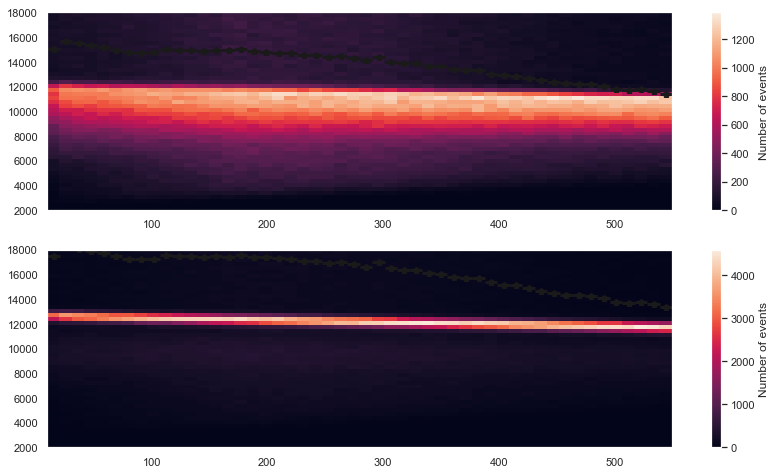

In [772]:
fig = plt.figure(figsize=(14,8))
ax      = fig.add_subplot(2, 1, 1)
nevt = h2(dst.Z, dst.S2e, 50, 50, krRanges.Z, krRanges.S2e, 
           profile=True)
ax      = fig.add_subplot(2, 1, 2)
nevt = h2(dst.Z, E0, 50, 50, krRanges.Z, krRanges.S2e, 
           profile=True)

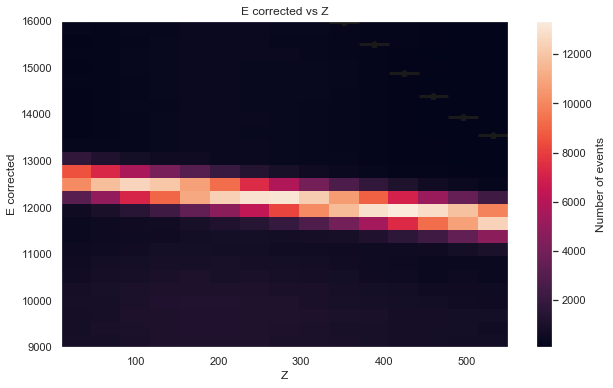

In [773]:
nevt = h2d(dst.Z, E0, krNbins.Z, krNbins.S2e, krRanges.Z, (9000,16000), 
           pltLabels=PlotLabels(x='Z', y='E corrected', title='E corrected vs Z'),
           profile=True,
           figsize=(10,6))

In [560]:
def plot_energy_in_z_slices(zdata, edata, nbins_z, range_z, range_e):
    """
    Slice the data in z, histogram each slice, return mean and std of energy in that slice

    """
    zbins   = np.linspace(*range_z, nbins_z + 1)
    fig = plt.figure(figsize=(18,12))
    for i in range(nbins_z):
        ebin = np.array(edata[in_range(zdata, *zbins[i:i + 2])])
        ax      = fig.add_subplot(5, 3, i+1)
        (_)     = h1(ebin,  bins = nbins_z, range =range_e)
        plot_histo(PlotLabels('E (pes)','Entries','Pre-filter'), ax, legendloc='upper left')

def energy_mean_and_std_in_z_slices(zdata, edata, nbins_z, range_z, range_e):
    """
    Slice the data in z, histogram each slice, return mean and std of energy in that slice

    """
    MU = []
    STD = []
    zbins   = np.linspace(*range_z, nbins_z + 1)
    for i in range(nbins_z):
        ebin = np.array(edata[in_range(zdata, *zbins[i:i + 2])])
        mu, std = mean_and_std(ebin, range_e)
        MU.append(mu)
        STD.append(std)
    return np.array(MU), np.array(STD)
  


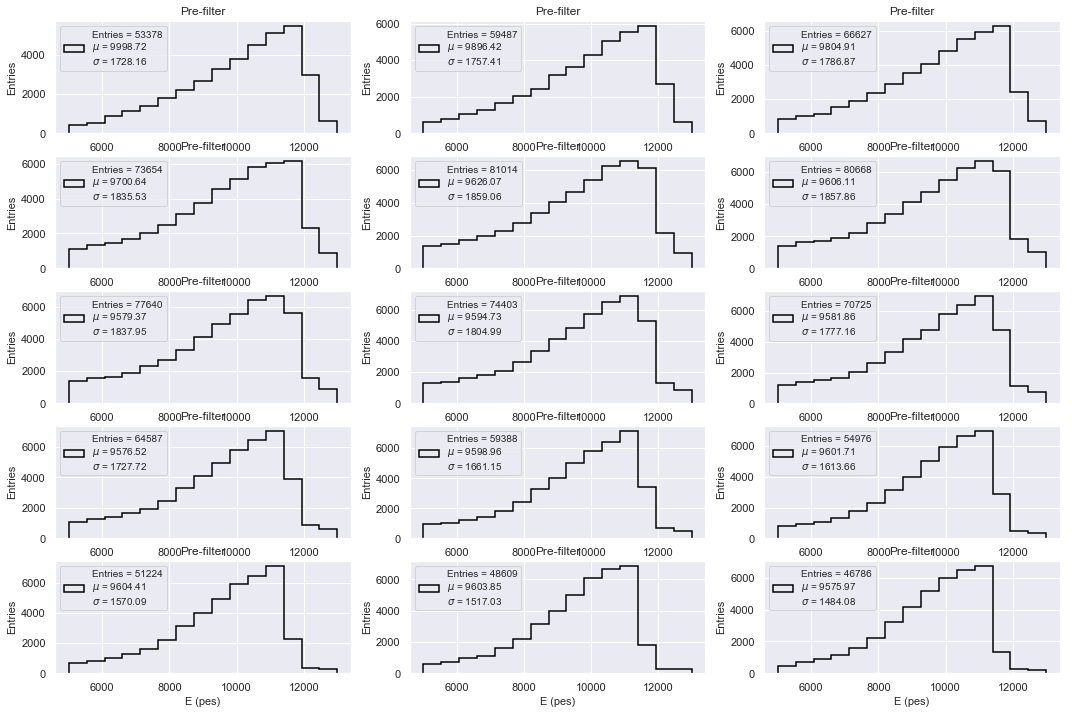

In [774]:
plot_energy_in_z_slices(dst.Z, dst.S2e, krNbins.Z, krRanges.Z, range_e=(5000, 13000))

## Restricting dst to fiducial region eliminates low energy background (x-rays)

In [777]:
dst = dst.assign(E0=E0)

In [590]:
dstf = dst[dst.R <= RFID]

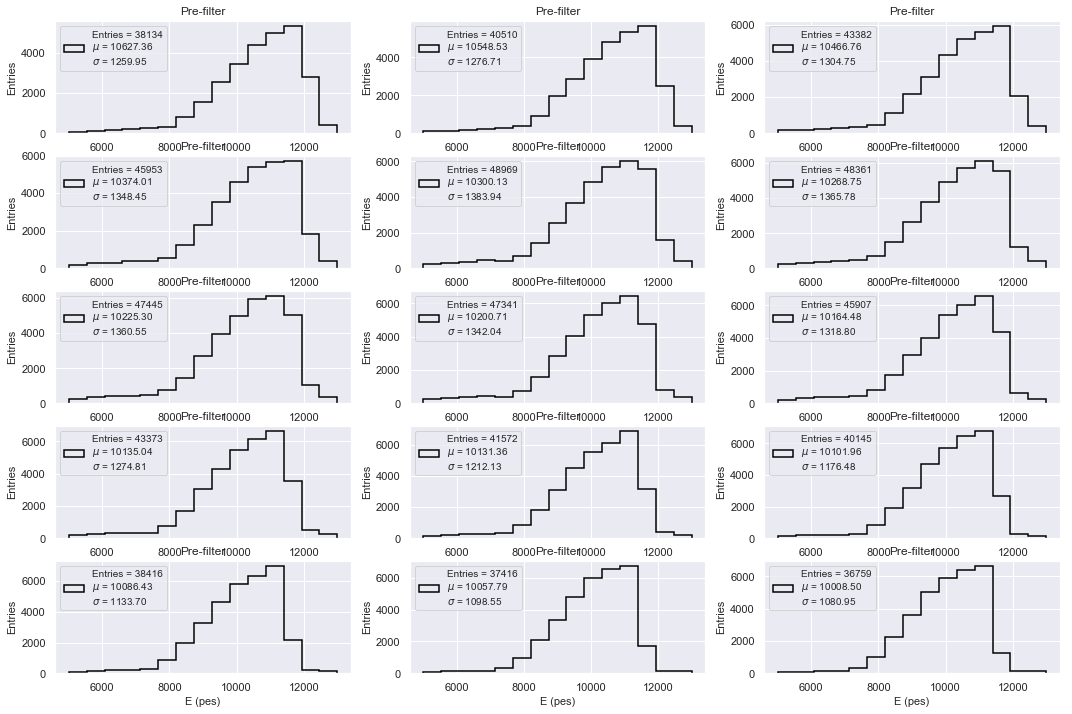

In [580]:
plot_energy_in_z_slices(dstf.Z, dstf.S2e, krNbins.Z, krRanges.Z, range_e=(5000, 13000))

In [581]:
n_fid   = len(dstf)
eff = n_fid   / ntot 
print(f"Total number of events with 1 s1 and 1 s2 in fiducial region : {n_fid}: selection eff = {eff} ")

Total number of events with 1 s1 and 1 s2 in fiducial region : 679129: selection eff = 0.19388927970253497 


In [707]:
def selection_in_band(z, e, nbins_z, nbins_e, range_z, range_e, n_sigma=5, plot=True):
    
    def fit_exp(zc, e_mean, e_sigma):
        valid_points = e_sigma > 0
        x    = zc     [valid_points]
        y    = e_mean [valid_points]
        yu   = e_sigma[valid_points]
        seed = expo_seed(x, y)
        f    = fitf.fit(fitf.expo, x, y, seed, sigma=yu)
        return f
        
    def fmin(fn, zc, e_sigma, n_sigma):
        return fn(zc) - n_sigma * e_sigma

    def fmax(fn, zc, e_sigma, n_sigma):
        return fn(zc) + n_sigma * e_sigma

    zbins   = np.linspace(*range_z, nbins_z + 1)
    zerror = np.diff(zbins) * 0.5
    zc, e_mean, e_sigma = fitf.profileX(z, e, nbins_z, range_z, range_e)
    valid_points = e_sigma > 0
    f = fit_exp(zc, e_mean, e_sigma)    

    mean_e, std_e    =  energy_mean_and_std_in_z_slices(z, e, nbins_z, range_z, range_e)
    
    yp  = mean_e +  n_sigma * std_e
    fp  = fit_exp(zc, yp, std_e)    
    ym  = mean_e -  n_sigma * std_e
    fm  = fit_exp(zc, ym, std_e) 

    # 3. Select events in the range defined by the band

    sel_inband = in_range(e, fm.fn(z), fp.fn(z))

        
    #sel_inband = in_range(e, fmin(f.fn, z, mean_std.mean(), n_sigma), fmax(f.fn, z, mean_std.mean(), n_sigma))
    
    if plot:
        fig = plt.figure(figsize=(10,6))
        ax      = fig.add_subplot(1, 1, 1)
        plt.errorbar(zc, mean_e, std_e, zerror,
                         "kp", label="Kr peak energy $\pm 1 \sigma$")
        plt.plot(zc, f.fn(zc))
        plt.errorbar(zc, yp, std_e, zerror,
                         "rp", label="Kr peak energy $\pm 1 \sigma$")
 
        plt.plot(zc, fp.fn(zc))
        plt.errorbar(zc, ym, std_e, zerror,
                     "bp", label="Kr peak energy $\pm 1 \sigma$")
        plt.plot(zc, fm.fn(zc))
        plt.xlabel('Z (mm)')
        plt.ylabel('S2e (pes)')
        plt.title('Selection in band')
    
    return mean_e, mean_std, zc, sel_inband

def plot_e0_with_sel(E0, E0s, bins = 50, erange =(0,16000),figsize=(12,6)):
    fig = plt.figure(figsize=figsize)
    ax      = fig.add_subplot(1, 2, 1)
    (_)     = h1(E0,  bins = bins, range =erange)
    plot_histo(PlotLabels('E (pes)','Entries','Pre-filter'), ax, legendloc='upper left')
    ax      = fig.add_subplot(1, 2, 2)
    (_)     = h1(E0s,  bins = bins, range =erange)
    plot_histo(PlotLabels('E (pes)','Entries','Post-filter'), ax, legendloc='upper left')
    plt.tight_layout()

def plot_emean_estd(zc, emean, estd, elim=(5000,15000), stdlim=(100,500), figsize=(12,6)):
    fig = plt.figure(figsize=figsize)
    ax      = fig.add_subplot(1, 2, 1)
    plt.plot(zc, emean)
    plt.xlabel("Z (mm)")
    plt.ylabel("Emean (pes)")
    plt.ylim(*elim)
    ax      = fig.add_subplot(1, 2, 2)
    plt.plot(zc, estd)
    plt.xlabel("Z (mm)")
    plt.ylabel("Estd (pes)")
    plt.ylim(*stdlim)
    plt.tight_layout()

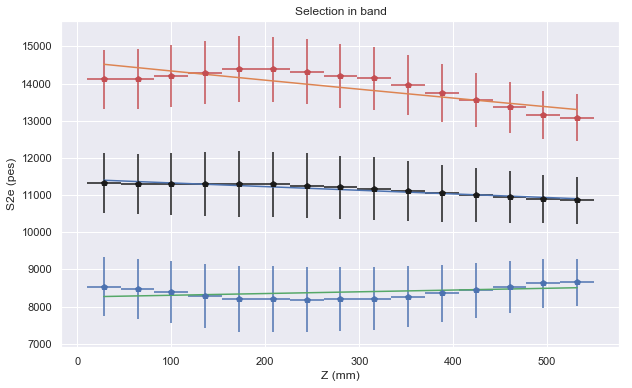

In [748]:
mean_e, mean_std, zc, sel_inband = selection_in_band(dst.Z, dst.S2e, krNbins.Z, krNbins.S2e, krRanges.Z, range_e=(10000, 14000), n_sigma=3.5, plot=True)

In [749]:
mean_std

array([740.45066633, 738.19954082, 732.80306833, 751.36316242,
       757.88807879, 745.01515159, 734.76167627, 723.05315507,
       710.48469592, 673.2007088 , 643.59816338, 623.3036952 ,
       588.78407433, 563.15288201, 549.67848398])

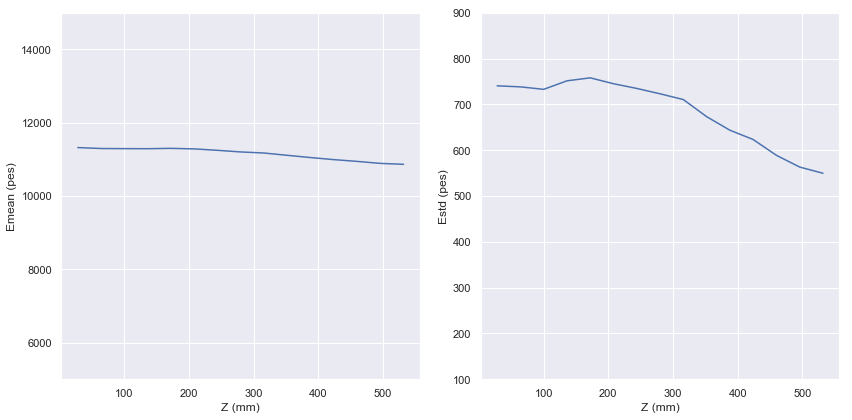

In [750]:
plot_emean_estd(zc, mean_e, mean_std, stdlim=(100,900), figsize=(12,6))

In [751]:
selection_info(sel_inband, 'Kr band')

Total number of selected candidates Kr band: 574517 (57.1 %)


'Total number of selected candidates Kr band: 574517 (57.1 %)'

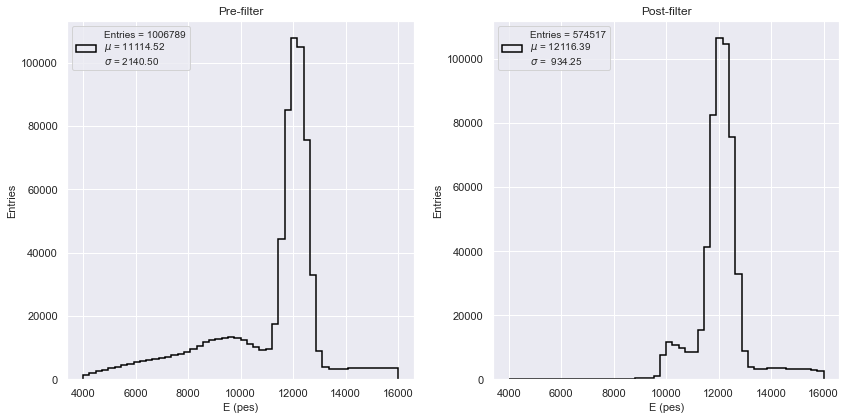

In [752]:
plot_e0_with_sel(dst.E0, dst.E0[sel_inband], bins = 50, erange =(4000,16000),figsize=(12,6))

In [775]:
from krcal.core.selection_functions           import selection_in_band
range_krs2 = (10.0e+3,14e+3)
sel_krband, fpl, fph, hp, pp = selection_in_band(dst.Z, E0,
                                                 range_z = krRanges.Z,
                                                 range_e = range_krs2,
                                                 nbins_z = 50,
                                                 nbins_e = 50,
                                                 nsigma  = 3.5)

/Users/jjgomezcadenas/Projects/KrCalib2/krcal/core/fit_functions.py:45: UserWarning: nof = 0 in chi2 calculation, return chi2 = {chi2_}
  warnings.warn('nof = 0 in chi2 calculation, return chi2 = {chi2_}', UserWarning)
/Users/jjgomezcadenas/Projects/KrCalib2/krcal/core/fit_functions.py:45: UserWarning: nof = 0 in chi2 calculation, return chi2 = {chi2_}
  warnings.warn('nof = 0 in chi2 calculation, return chi2 = {chi2_}', UserWarning)


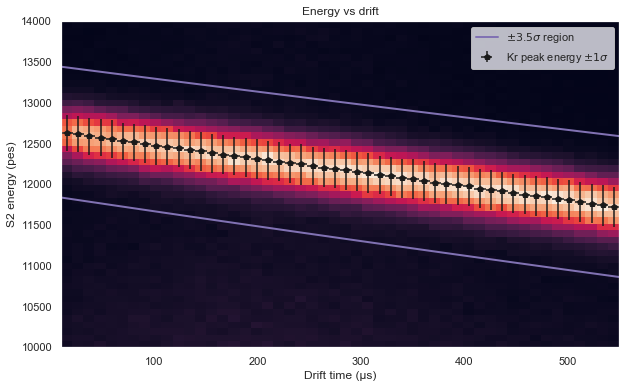

In [776]:
from krcal.core.selection_functions           import plot_selection_in_band
plot_selection_in_band(fpl, fph, hp, pp)

In [778]:
selection_info(sel_krband, 'Kr band')

Total number of selected candidates Kr band: 472518 (46.9 %)


'Total number of selected candidates Kr band: 472518 (46.9 %)'

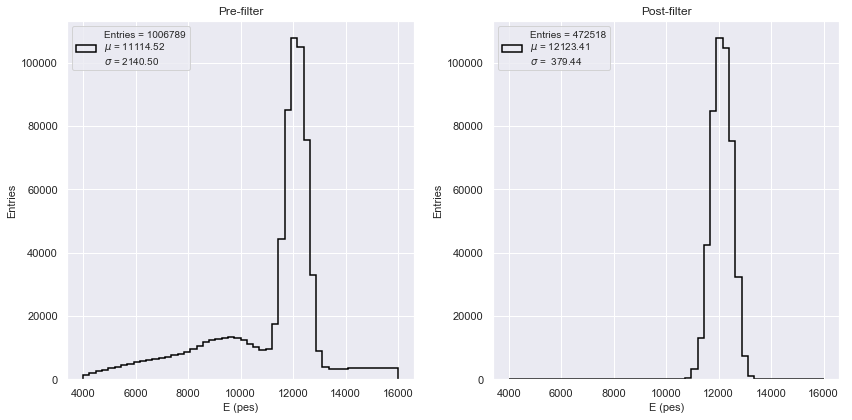

In [779]:
plot_e0_with_sel(dst.E0, dst.E0[sel_krband], bins = 50, erange =(4000,16000),figsize=(12,6))

In [780]:
dsts = dst[sel_inband]
n_sel   = len(dsts)
eff = n_sel   / ntot 
print(f"Total number of events with 1 s1 and 1 s2 in fiducial region and in band : {n_sel}: selection eff = {eff} ")

Total number of events with 1 s1 and 1 s2 in fiducial region and in band : 574517: selection eff = 0.16402286945022418 


## S2 distributions reduced in background

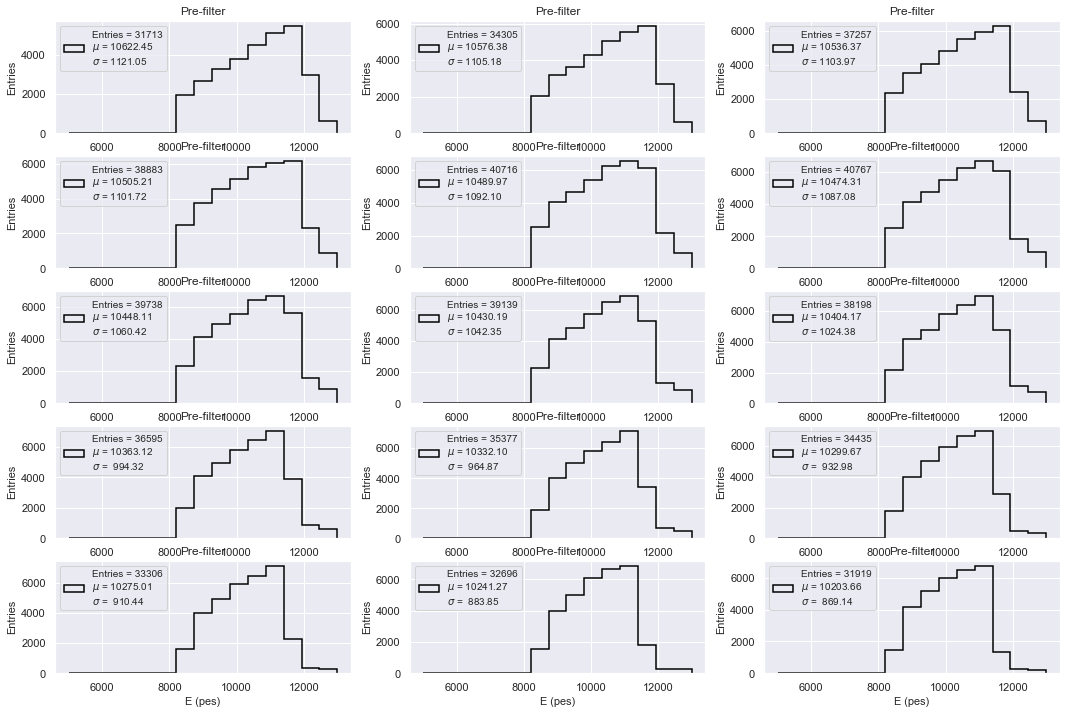

In [781]:
plot_energy_in_z_slices(dsts.Z, dsts.S2e, krNbins.Z, krRanges.Z, range_e=(5000, 13000))

## S1 & S2 distributions again

In [782]:
s1d = s1d_from_dst(dsts)

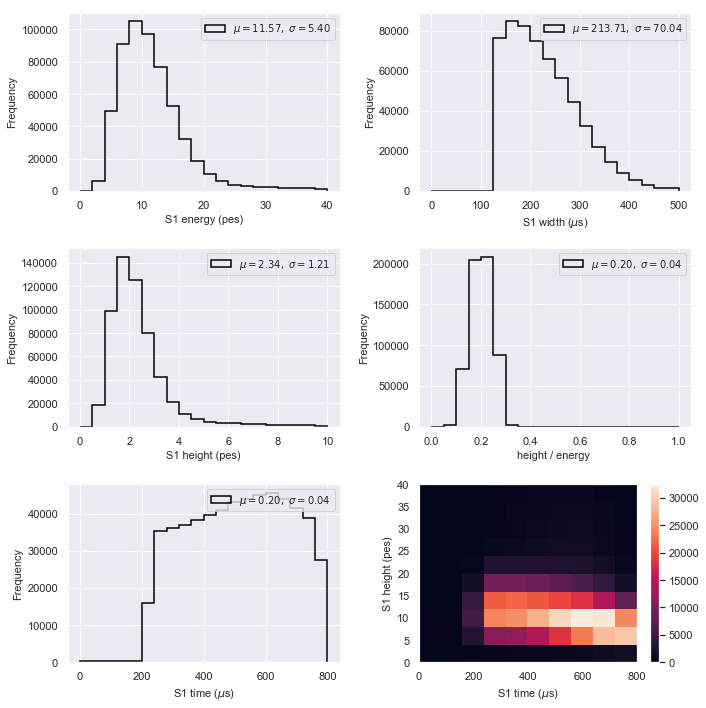

In [783]:
plot_s1histos(dsts,  s1d, bins=20, figsize=(10,10))

### Z still shows a bump

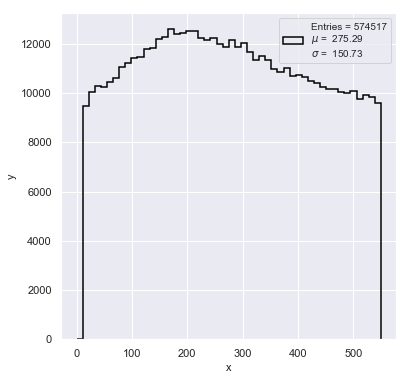

In [784]:
(_) = h1d(dsts.Z, bins = 50, range =(0,550))

### S2 distributions reloaded

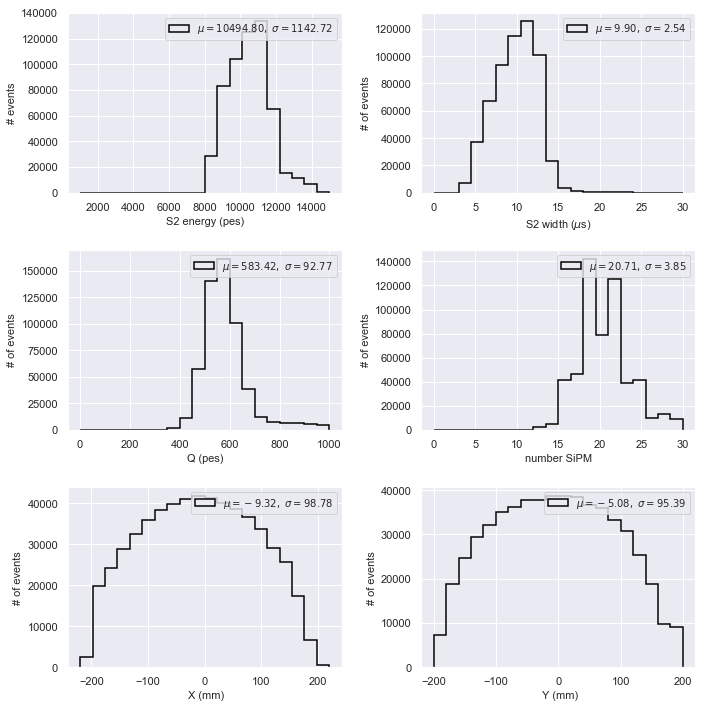

In [785]:
s2d = s2d_from_dst(dsts)
plot_s2histos(dsts, s2d, bins=20, emin=1000, emax=15000, figsize=(10,10))

In [786]:
dstf = dsts[dsts.R <= RFID]

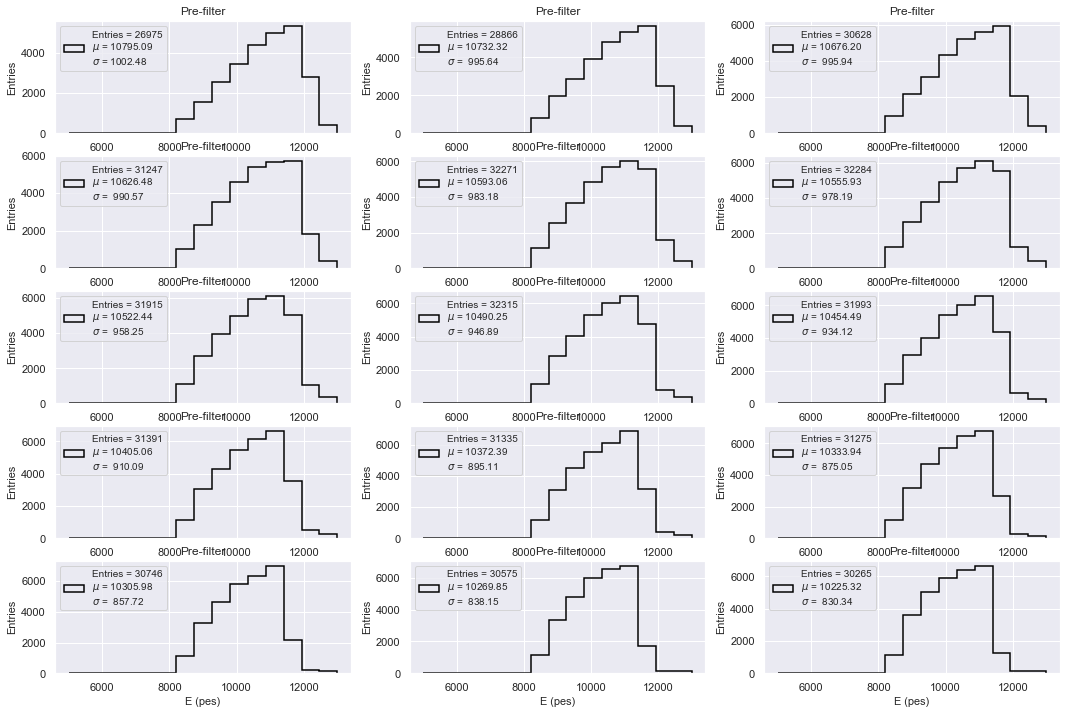

In [787]:
plot_energy_in_z_slices(dstf.Z, dstf.S2e, krNbins.Z, krRanges.Z, range_e=(5000, 13000))

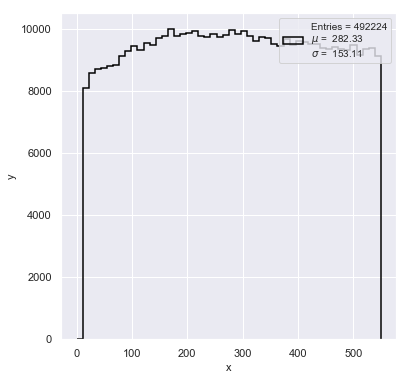

In [788]:
(_) = h1d(dstf.Z, bins = 50, range =(0,550))

# Selection completed. Now compute map and check resolution

In [789]:
dst = dstf

## Time series, showing lifetime very high and flat

In [790]:
time_bins = 5
ti = timeit(get_time_series_df)
ts, masks = ti(time_bins, (DT[0],DT[-1]), dst)

Time spent in get_time_series_df: 0.003946065902709961 s


In [791]:
ti = timeit(time_fcs_df)
fps = ti(ts, masks, dst, 
         nbins_z = 15,
         nbins_e = 25,
         range_z = (10, 550),
         range_e = (7000, 18000),
         energy  = 'S2e',
         fit     = FitType.profile)  # fps: fit-profile series (implicit is a time series, using profile)

Time spent in time_fcs_df: 0.13843202590942383 s


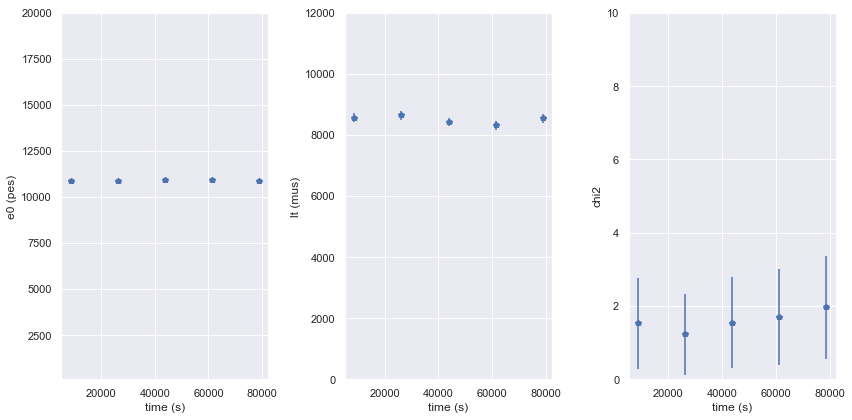

In [792]:
plot_time_fcs(fps,
              range_chi2  = (0,10),
              range_e0    = (100,20000),
              range_lt    = (0, 12000),
              figsize     = (12,6))

## Divide chamber in sectors of XY

In [793]:
log.setLevel(logging.INFO) # turn to DEBUG to follow progress of this part 

In [794]:
ti = timeit(select_xy_sectors_df)
KXY = ti(dst, krBins.X, krBins.Y)

Time spent in select_xy_sectors_df: 2.6781837940216064 s


In [795]:
nXY = event_map_df(KXY)

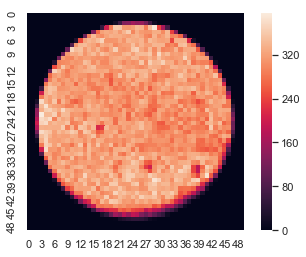

In [796]:
ax = sns.heatmap(nXY, square=True)

## Fits in XY sectors

## Maps

#### The first step is to fit a map XY (in time series) for the number of time bins required (in this case 1)

In [797]:
log.setLevel(logging.INFO)

In [798]:
ti = timeit(fit_map_xy_df)
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fmxy = ti(selection_map = KXY,
              event_map      = nXY,
              n_time_bins    = 1,
              time_diffs     = DT,
              nbins_z        = krNbins.Z, 
              nbins_e        = krNbins.S2e, 
              range_z        = z_range, 
              range_e        = e_range,
              energy         = 'S2e',
              z              = 'Z',
              fit            = FitType.unbined,
              n_min          = 100)

Time spent in fit_map_xy_df: 6.194246292114258 s


#### The second step is to obtain the maps themselves from the fit-map-XY

In [799]:
ti = timeit(tsmap_from_fmap)
tsm = ti(fmxy)

Time spent in tsmap_from_fmap: 0.0016567707061767578 s


#### Third step: select the corresponding map in the time series (in this case just one, ts=0)

In [800]:
am = amap_from_tsmap(tsm, 
                     ts = 0, 
                     range_e     = e_range,
                     range_chi2  = c2_range,
                     range_lt    = lt_range)

In [801]:
log.setLevel(logging.INFO)

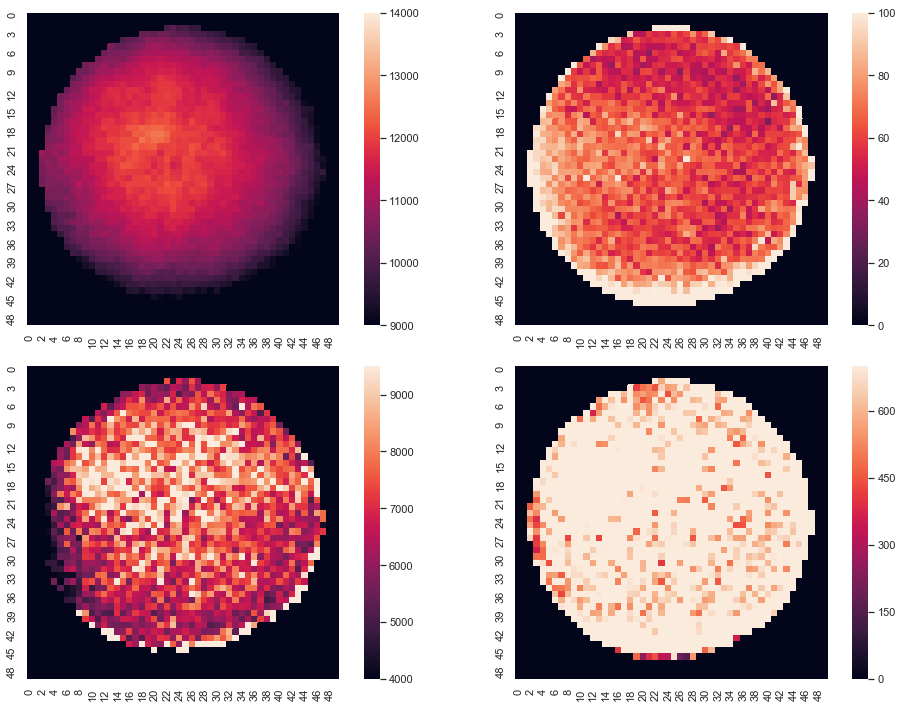

In [802]:
draw_xy_maps(am,
            e0lims  = (9000, 14000),
            ltlims  = (4000, 9500),
            eulims  = (0.0,  100),
            lulims  = (0, 700),
            figsize=(14,10))

In [803]:
amap_average(am) 

ASectorMap(chi2=1.3119621237068662, e0=10759.177648212773, lt=6753.897652033297, e0u=75.78921869912692, ltu=71191.53045066248, mapinfo=None)

#### Get rid of outlayers that distort mean and error

In [804]:
rmap = regularize_maps(am, erange=e_range, ltrange=(1000, 15000))

2019-08-20 17:22:02,873 | INFO :  set nans to average value of interval = 10000.0
2019-08-20 17:22:03,052 | INFO :  set nans to average value of interval = 8000.0


In [805]:
amap_average(rmap)

ASectorMap(chi2=1.3119621237068662, e0=10759.177648212773, lt=7228.082206416286, e0u=75.78921869912692, ltu=1084.700711202901, mapinfo=None)

In [806]:
asm = relative_errors(rmap)

In [807]:
amv = amap_average(asm)
amv

ASectorMap(chi2=1.3119621237068662, e0=10759.177648212773, lt=7228.082206416286, e0u=0.7213494907455591, ltu=14.337444067936195, mapinfo=None)

#### Draw the maps using default colormap

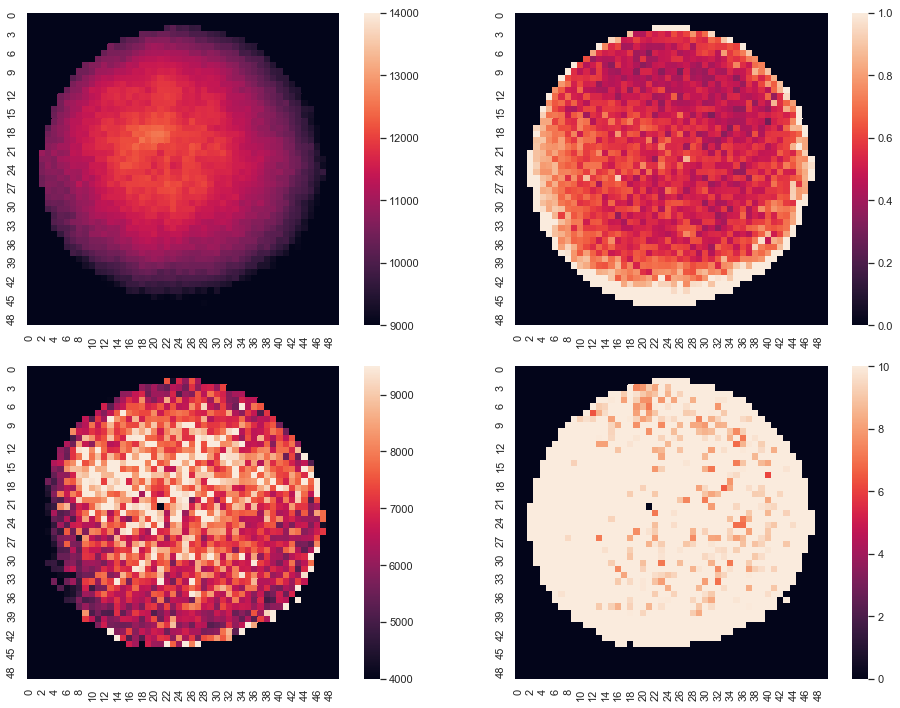

In [808]:
draw_xy_maps(asm,
            e0lims  = (9000, 14000),
            ltlims  = (4000, 9500),
            eulims  = (0.0,  1),
            lulims  = (0, 10),
            figsize=(14,10))

In [809]:
asmAv = amap_replace_nan_by_mean(asm, amMean=amv)

In [810]:
amap_average(asmAv)

ASectorMap(chi2=1.2630499956093755, e0=10844.673201667152, lt=7335.609741781534, e0u=0.6857677414597311, ltu=13.789491185713052, mapinfo=None)

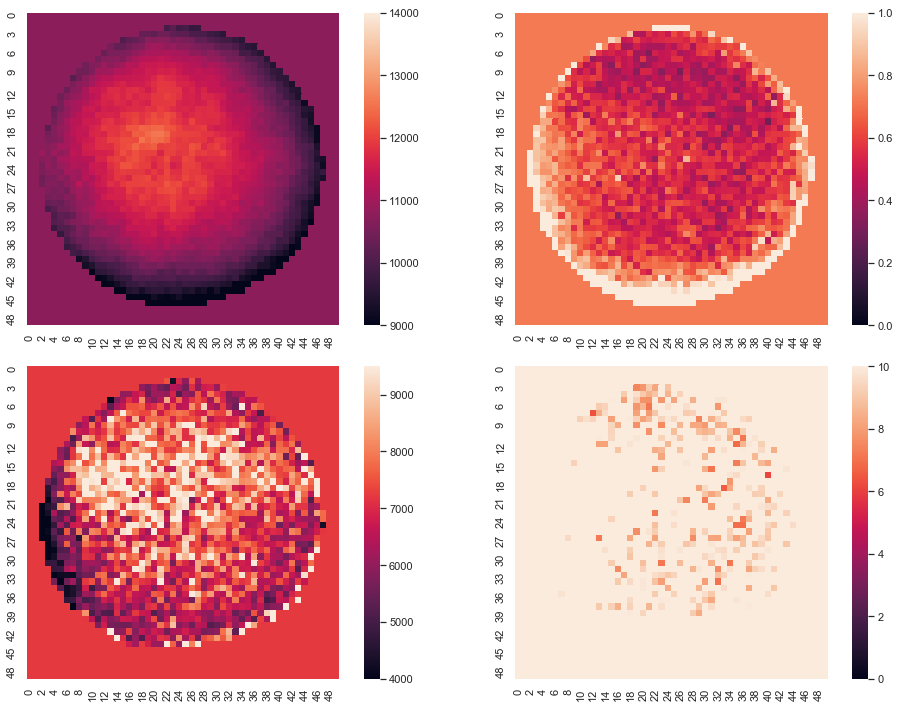

In [811]:
draw_xy_maps(asmAv,
            e0lims  = (9000, 14000),
            ltlims  = (4000, 9500),
            eulims  = (0.0,  1),
            lulims  = (0, 10),
            figsize=(14,10))

In [812]:
asm = add_mapinfo(asmAv, krRanges.X, krRanges.Y, krNbins.X, krNbins.Y, run_number=7439)

In [813]:
asm.mapinfo

xmin          -200
xmax           200
ymin          -200
ymax           200
nx              50
ny              50
run_number    7439
dtype: int64

In [814]:
write_maps(asm, filename=emap_filename)

In [815]:
emaps = read_maps(filename=emap_filename)

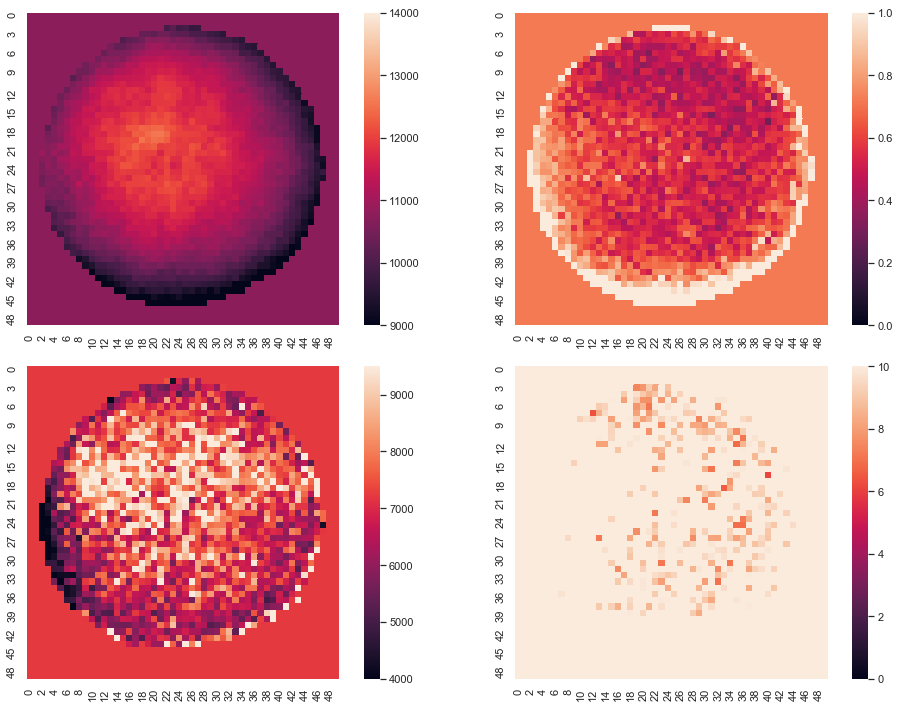

In [816]:
draw_xy_maps(emaps,
            e0lims  = (9000, 14000),
            ltlims  = (4000, 9500),
            eulims  = (0.0,  1),
            lulims  = (0, 10),
            figsize=(14,10))

## Now check the corrections that can be achieved with the single maps

In [817]:
amap_average(emaps)

ASectorMap(chi2=1.2630499956093755, e0=10844.673201667152, lt=7335.609741781534, e0u=0.6857677414597311, ltu=13.789491185713052, mapinfo=None)

In [818]:
norm = amap_max(emaps)

In [819]:
norm

ASectorMap(chi2=20.580398682442432, e0=12580.440922213269, lt=14986.180381467739, e0u=2.9415282205063265, ltu=102.62026361762898, mapinfo=None)

#### E0 correction:

In [820]:
ti = timeit(e0_xy_correction)
E0 = ti(dst.S2e.values,
        dst.X.values,
        dst.Y.values,
        E0M = emaps.e0 / norm.e0, 
        xr  = krRanges.X,
        yr  = krRanges.Y,
        nx  = krNbins.X, 
        ny  = krNbins.Y)

Time spent in e0_xy_correction: 4.324535131454468 s


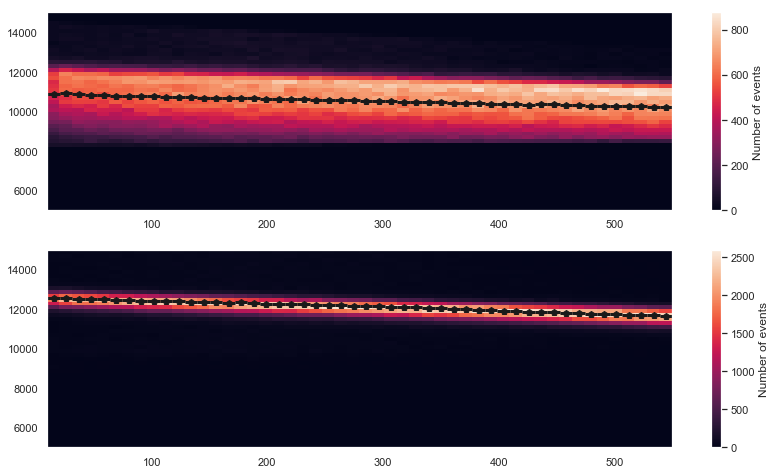

In [821]:
fig = plt.figure(figsize=(14,8))
ax      = fig.add_subplot(2, 1, 1)
nevt = h2(dst.Z, dst.S2e, 50, 50, krRanges.Z, (5000,15000), 
           profile=True)
ax      = fig.add_subplot(2, 1, 2)
nevt = h2(dst.Z, E0, 50, 50, krRanges.Z, (5000,15000), 
           profile=True)

## XY (single time) LT correction

In [822]:
ti = timeit(lt_xy_correction)
E = ti(E0, 
       dst.X.values, 
       dst.Y.values,
       dst.Z.values, 
       LTM = emaps.lt,
       xr  = krRanges.X,
       yr  = krRanges.Y,
       nx  = krNbins.X, 
       ny  = krNbins.Y)


Time spent in lt_xy_correction: 5.275395154953003 s


In [823]:
er = (5000,15000)

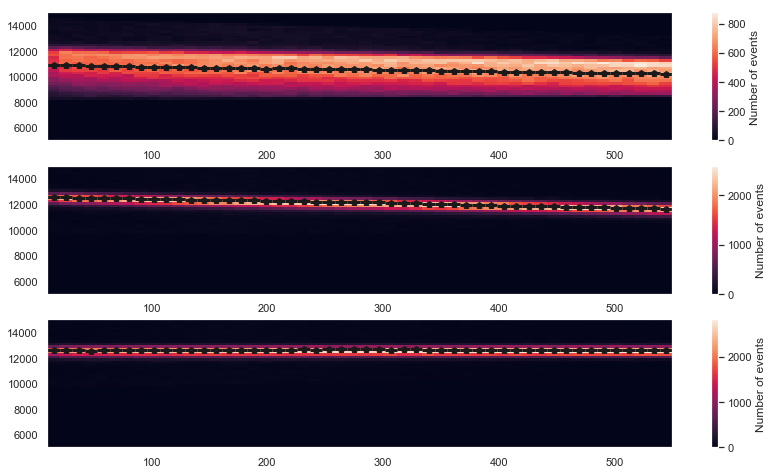

In [824]:
fig = plt.figure(figsize=(14,8))
ax      = fig.add_subplot(3, 1, 1)
nevt = h2(dst.Z, dst.S2e, 50, 50, krRanges.Z, er, 
           profile=True)
ax      = fig.add_subplot(3, 1, 2)
nevt = h2(dst.Z, E0, 50, 50, krRanges.Z, er, 
           profile=True)
ax      = fig.add_subplot(3, 1, 3)
nevt = h2(dst.Z, E, 50, 50, krRanges.Z, er, 
           profile=True)

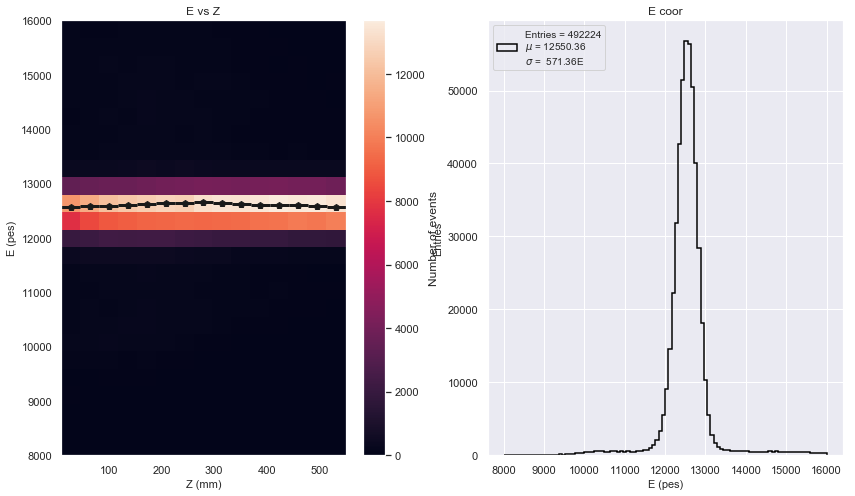

In [825]:
e_range = (8000,16000)
zrange = (10,550)
fig = plt.figure(figsize=(14,8))
ax      = fig.add_subplot(1, 2, 1)

nevt = h2(dst.Z, E, krNbins.Z, krNbins.S2e, krRanges.Z, e_range, profile=True)
plot_histo(PlotLabels(x='Z (mm)', y='E (pes)', title='E vs Z'), ax, legend=False)

ax      = fig.add_subplot(1, 2, 2)
(_)     = h1(E,  bins = 100, range =e_range, stats=True, lbl = 'E')
plot_histo(PlotLabels('E (pes)','Entries','E coor'), ax, legendloc='upper left')

  Fit was valid = True
 Emu       = 12537.591046735244 +-0.38934613285775327 
 E sigma   = 259.0306961440132 +-0.2999163544510491 
 chi2    = 5.026764066391815 
 sigma E/E (FWHM)     (%) =4.855176195086859
 sigma E/E (FWHM) Qbb (%) =0.6270555039906536 


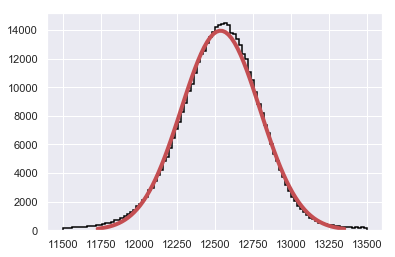

In [827]:
fc = fit_energy(E, nbins=100, range=(11500, 13500))
plot_fit_energy(fc)
print_fit_energy(fc)

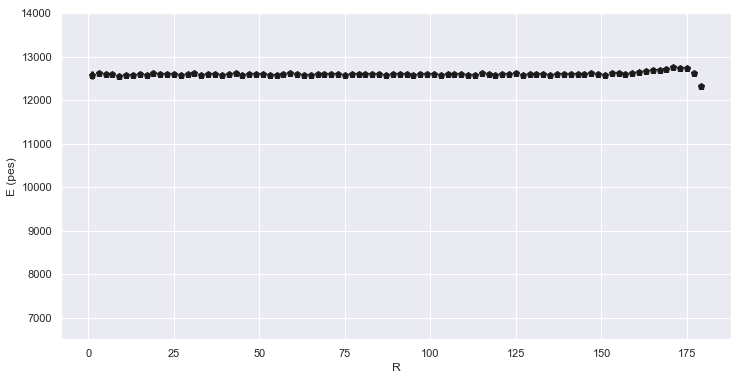

In [828]:
energy_X_profile(dst.R, E, xnbins = 100, xrange=(0,200), xlabel = 'R',
                 erange=(6500, 14000),  
                 figsize=(12,6))

### Select events in the region

- R < 180
- 10 < z < 550
- 11000 < E < 13500

In [829]:
dst = dst.assign(E=E)

In [830]:
RFID = 170
dst_R     = dst[dst.R < RFID]

### Repeat profles

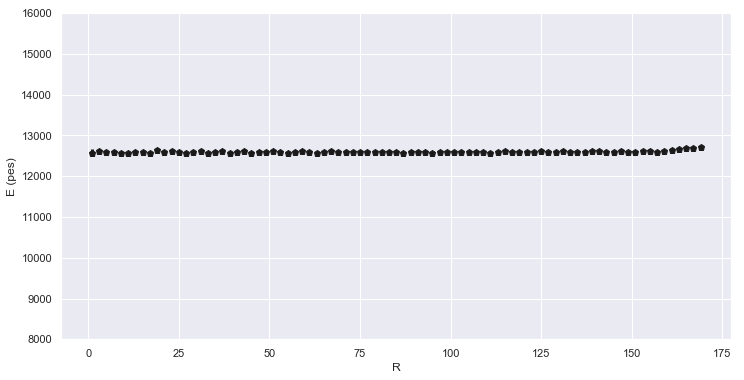

In [831]:
energy_X_profile(dst_R.R, dst_R.E, xnbins = 100, xrange=(0,200), xlabel = 'R',
                 erange=e_range,  
                 figsize=(12,6))

#### Everything is flat. No need for further corrections. 

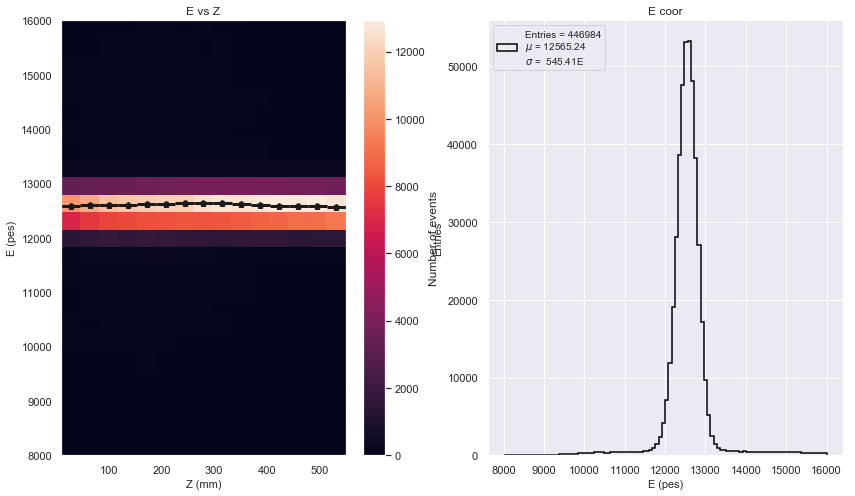

In [832]:
fig = plt.figure(figsize=(14,8))
ax      = fig.add_subplot(1, 2, 1)

nevt = h2(dst_R.Z, dst_R.E, krNbins.Z, krNbins.S2e, krRanges.Z, e_range, profile=True)
plot_histo(PlotLabels(x='Z (mm)', y='E (pes)', title='E vs Z'), ax, legend=False)

ax      = fig.add_subplot(1, 2, 2)
(_)     = h1(dst_R.E,  bins = 100, range =e_range, stats=True, lbl = 'E')
plot_histo(PlotLabels('E (pes)','Entries','E coor'), ax, legendloc='upper left')

  Fit was valid = True
 Emu       = 12552.24668960803 +-0.408493037559329 
 E sigma   = 246.7913933823463 +-0.32979522804085265 
 chi2    = 2.7773354686308616 
 sigma E/E (FWHM)     (%) =4.620366288121639
 sigma E/E (FWHM) Qbb (%) =0.5967293451371251 


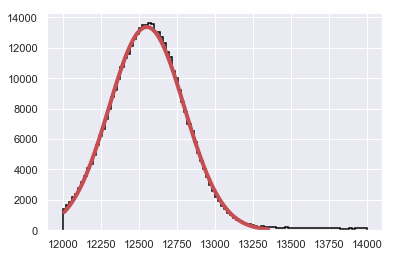

In [833]:
fc = fit_energy(dst_R.E, nbins=100, range=(12000, 14000))
plot_fit_energy(fc)
print_fit_energy(fc)

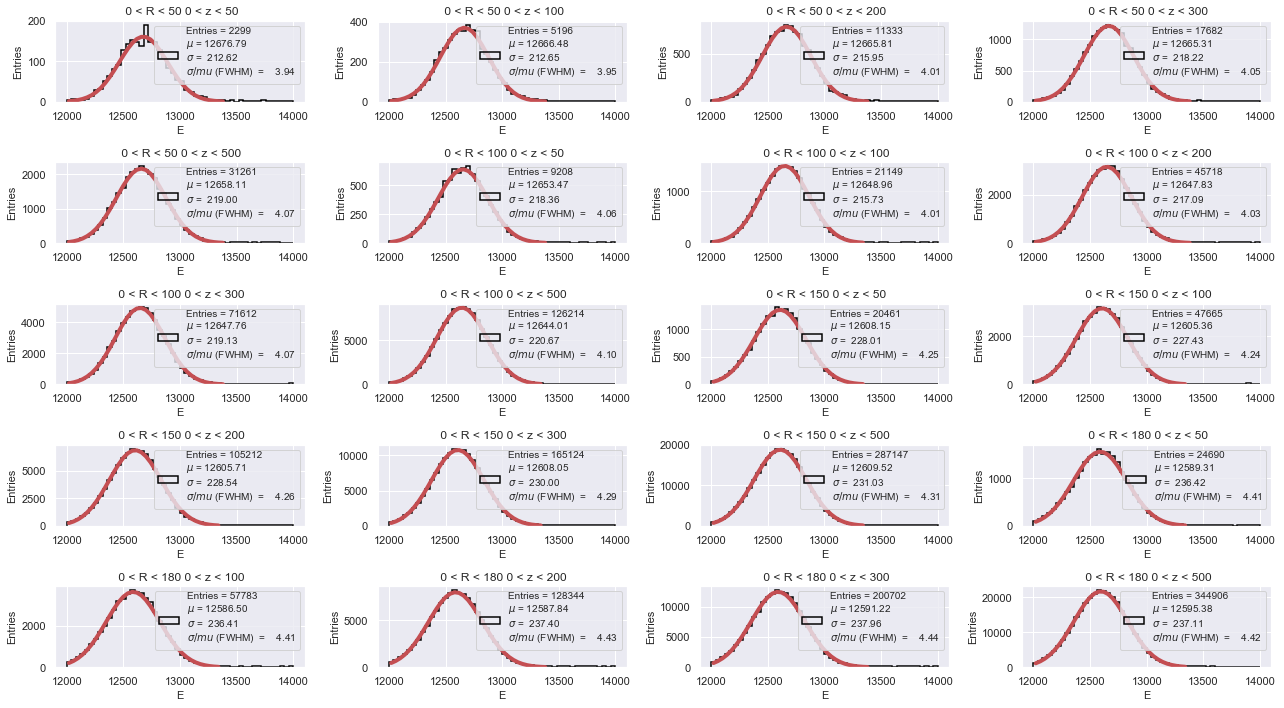

In [685]:
Ri = (50, 100,150,180)
Zi = (50, 100,200,300,500)

FC, FCE = resolution_r_z(Ri, Zi, dst_R.R, dst_R.Z, dst_R.E,
                    enbins = 50,
                    erange = (12000,14000),
                    ixy = (5,4),
                    fdraw  = True,
                    fprint = False,
                    figsize = (18,10)) 

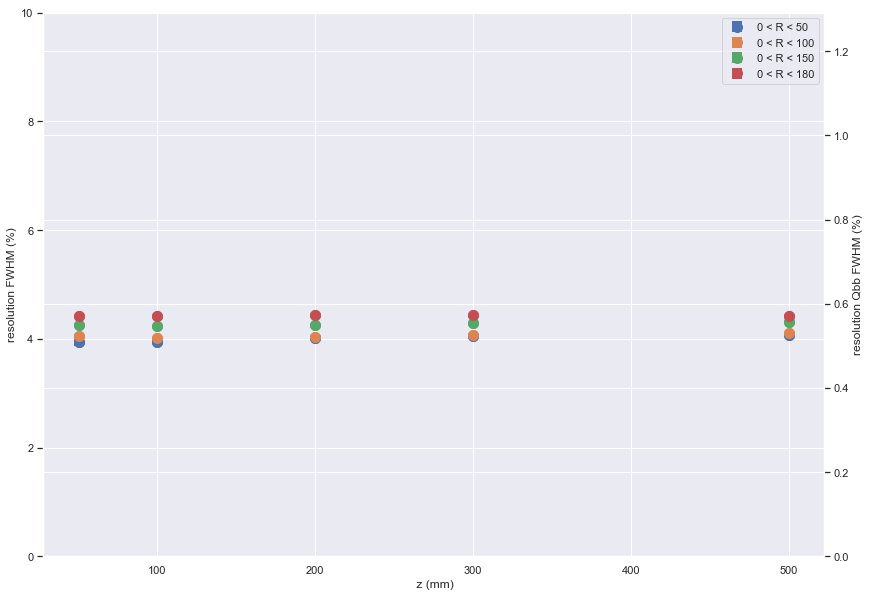

In [686]:
plot_resolution_r_z(Ri, Zi, FC, FCE, r_range=(0,10))

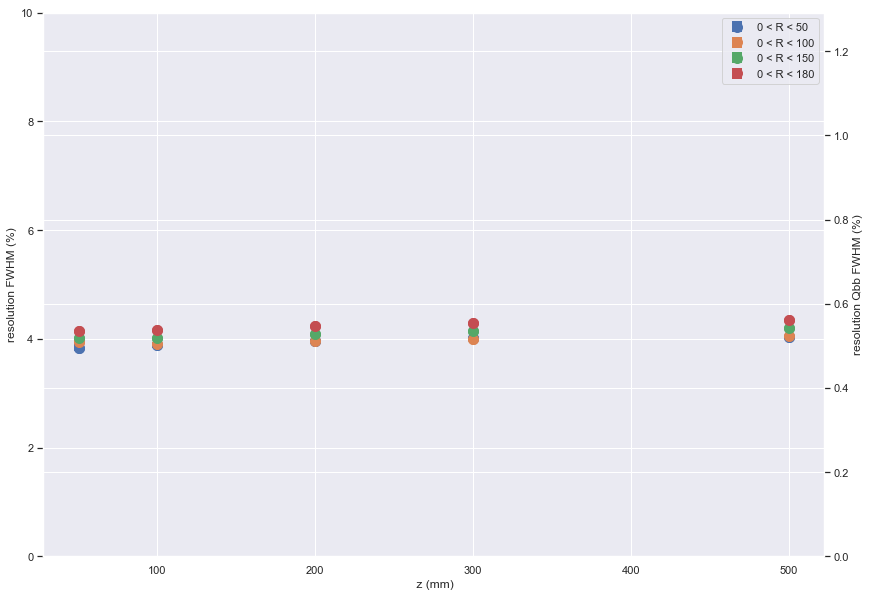

In [394]:
plot_resolution_r_z(Ri, Zi, FC, FCE, r_range=(0,10))

In [258]:
if (write_filtered_dst):
    print('writing filtered dst ', output_dst_filename)
    kdst_write(dst, output_dst_filename)

writing filtered dst  /Users/jjgomezcadenas/Projects/ICDATA/dst/dst_7439_trigger1_0000_8952.h5
